In [40]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates
import datetime

from scipy.integrate import odeint
from scipy import linalg as la
from scipy import optimize
import scipy
import csv
import pandas as pd

config = {
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{CJK}",  # 预先导入CJK宏包处理中文
}
plt.rcParams.update(config)

In [41]:
# 假设你的DataFrame名称为df
df = pd.read_csv("../../附件/附件2.csv")  # 如果数据已经在DataFrame中，跳过这步

# 筛选特定分拣中心的数据
sc3_data = df[df["分拣中心"] == "SC4"]

# 将日期和小时合并为一个时间戳
sc3_data["时间"] = pd.to_datetime(
    sc3_data["日期"] + " " + sc3_data["小时"].astype(str) + ":00:00"
)


/tmp/ipykernel_1291/2295532656.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc3_data["时间"] = pd.to_datetime(


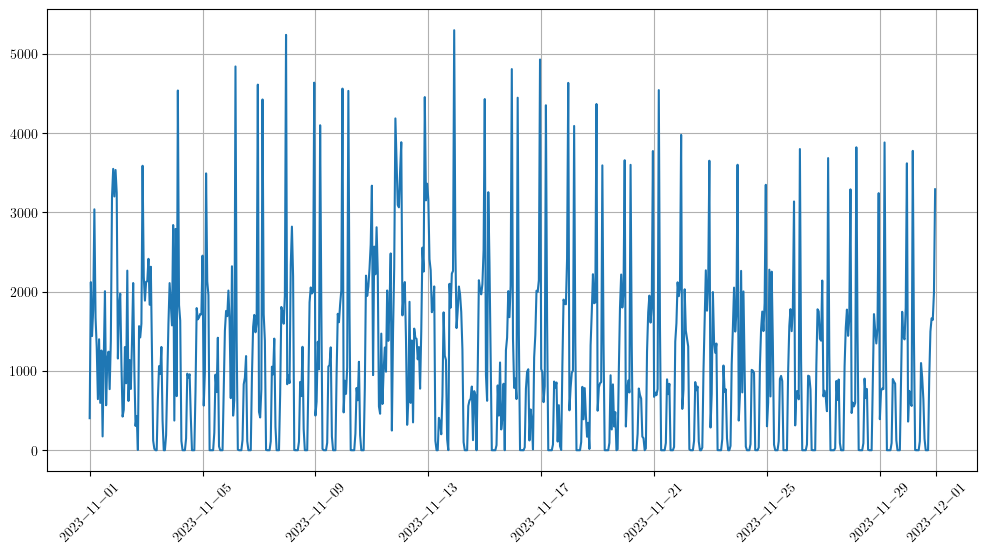

In [42]:

# 按时间排序
sc3_data = sc3_data.sort_values("时间")

# 绘图
plt.figure(figsize=(12, 6))
plt.plot(sc3_data["时间"], sc3_data["货量"])
# plt.title("SC3 货量随时间变化图")
# plt.xlabel("时间")
# plt.ylabel("货量")
plt.grid(True)
plt.xticks(rotation=45)  # 旋转x轴标签以便查看

# 显示图表
plt.show()

In [47]:
# 假设你的DataFrame名称为df
df = pd.read_csv(
    "../SC_datas_2/predicted_volumes.csv"
)  # 如果数据已经在DataFrame中，跳过这步

# 筛选特定分拣中心的数据，例如分拣中心3
sc_data = df[df['SC_id'] == 4]

# 创建一个完整的时间戳
sc_data['timestamp'] = pd.to_datetime(sc_data['date'] + ' ' + sc_data['hour'].astype(str) + ':00:00')
# 按时间戳排序
sc_data = sc_data.sort_values('timestamp')

# 绘图
plt.figure(figsize=(14, 7))
plt.plot(sc3_data["时间"], sc3_data["货量"],label=r"\begin{CJK*}{UTF8}{gbsn}SC4的真实图线\end{CJK*}")
plt.plot(sc_data['timestamp'], sc_data['predicted_volume'],label=r"\begin{CJK*}{UTF8}{gbsn}SC4的预测图线\end{CJK*}")
plt.xlabel(r"\begin{CJK*}{UTF8}{gbsn}时间\end{CJK*}")
plt.ylabel(r"\begin{CJK*}{UTF8}{gbsn}货量\end{CJK*}")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

# 显示图表
# plt.show()
with PdfPages("SC_4_2.pdf") as pdf:
    pdf.savefig()
    plt.close()

/tmp/ipykernel_1291/1650147291.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_data['timestamp'] = pd.to_datetime(sc_data['date'] + ' ' + sc_data['hour'].astype(str) + ':00:00')
